# Visualization and Modern Data Science

> Getting Started with SQL

Kuo, Yao-Jen <yaojenkuo@ntu.edu.tw> from [DATAINPOINT](https://www.datainpoint.com)

In [1]:
import sqlite3
import pandas as pd
from ks2020 import KaggleSurvey2020

## The What and Why Part of SQL

## What is SQL?

> SQL(pronounced ess-que-ell or sequel) is a language specifically designed with databases in mind. SQL enables people to create databases, add new data to them, maintain the data in them, and retrieve selected parts of the data. Developed in the 1970s at IBM, SQL has grown and advanced over the years to become the industry standard.

Source: <https://www.amazon.com/SQL-Dummies-Computer-Tech/dp/1119527074/>

## Why SQL?

- SQL gives us improved programmatic control over the structure of data, leading to efficiency, speed, and accuracy
- SQL is also an excellent adjunct to programming languages used in the data sciences, such as R and Python
- For people with no background in programming languages, SQL often serves as an easy-to-understand introduction into concepts related to data structures and programming logic

## What is a database?

> A database is like a collection of data items (comic books, product orders and player profile).If we define the term more strictly, a database is a **self-describing** collection of **integrated records**. A record is a representation of some physical or conceptual object.

Source: <https://www.amazon.com/SQL-Dummies-Computer-Tech/dp/1119527074/>

## Characteristics of a database

- Integrated records: the observations in a database is accompanied by attributes
- Self-describing: a database contains metadata

## What does integrated records mean?

In [2]:
def show_without_attributes():
    conn = sqlite3.connect('../datasets/nba.db')
    df = pd.read_sql("""SELECT * FROM players LIMIT 5;""", conn)
    return df.loc[:, ].values

In [3]:
show_without_attributes()

array([['LeBron', 'James', 'James, LeBron', 2544, 1610612747, 23, 'F', 6,
        9, 2.06, 250.0, 113.4, '1984-12-30', 2003, 17,
        'St. Vincent-St. Mary HS (OH)',
        'St. Vincent-St. Mary HS (OH)/USA', 'USA'],
       ['Carmelo', 'Anthony', 'Anthony, Carmelo', 2546, 1610612757, 0,
        'F', 6, 7, 2.01, 238.0, 108.0, '1984-05-29', 2003, 17,
        'Syracuse', 'Syracuse/USA', 'USA'],
       ['Udonis', 'Haslem', 'Haslem, Udonis', 2617, 1610612748, 40, 'F',
        6, 8, 2.03, 235.0, 106.6, '1980-06-09', 2003, 17, 'Florida',
        'Florida/USA', 'USA'],
       ['Dwight', 'Howard', 'Howard, Dwight', 2730, 1610612755, 39,
        'C-F', 6, 10, 2.08, 265.0, 120.2, '1985-12-08', 2004, 16,
        'SW Atlanta Christian Academy (GA)',
        'SW Atlanta Christian Academy (GA)/USA', 'USA'],
       ['Andre', 'Iguodala', 'Iguodala, Andre', 2738, 1610612748, 28,
        'G-F', 6, 6, 1.98, 215.0, 97.5, '1984-01-28', 2004, 16,
        'Arizona', 'Arizona/USA', 'USA']], dtype=object)

In [4]:
def show_with_attributes():
    conn = sqlite3.connect('../datasets/nba.db')
    df = pd.read_sql("""SELECT * FROM players LIMIT 5;""", conn)
    return df

In [5]:
show_with_attributes()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,pos,heightFeet,heightInches,heightMeters,weightPounds,weightKilograms,dateOfBirthUTC,nbaDebutYear,yearsPro,collegeName,lastAffiliation,country
0,LeBron,James,"James, LeBron",2544,1610612747,23,F,6,9,2.06,250.0,113.4,1984-12-30,2003,17,St. Vincent-St. Mary HS (OH),St. Vincent-St. Mary HS (OH)/USA,USA
1,Carmelo,Anthony,"Anthony, Carmelo",2546,1610612757,0,F,6,7,2.01,238.0,108.0,1984-05-29,2003,17,Syracuse,Syracuse/USA,USA
2,Udonis,Haslem,"Haslem, Udonis",2617,1610612748,40,F,6,8,2.03,235.0,106.6,1980-06-09,2003,17,Florida,Florida/USA,USA
3,Dwight,Howard,"Howard, Dwight",2730,1610612755,39,C-F,6,10,2.08,265.0,120.2,1985-12-08,2004,16,SW Atlanta Christian Academy (GA),SW Atlanta Christian Academy (GA)/USA,USA
4,Andre,Iguodala,"Iguodala, Andre",2738,1610612748,28,G-F,6,6,1.98,215.0,97.5,1984-01-28,2004,16,Arizona,Arizona/USA,USA


## What does self-describing mean?

> Metadata is "data that provides information about other data". In other words, it is "data about data".

Source: <https://en.wikipedia.org/wiki/Metadata>

## Seriously, what the `f***` is metadata?

![](https://media.giphy.com/media/xT0xeif517lOYwnH2g/giphy.gif)

Source: <https://giphy.com/>

In [6]:
def show_metadata():
    conn = sqlite3.connect('../datasets/nba.db')
    df = pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('players');""", conn)
    return df

In [7]:
show_metadata()

,cid,name,type,notnull,dflt_value,pk
0,0,firstName,TEXT,0,None,0
1,1,lastName,TEXT,0,None,0
2,2,temporaryDisplayName,TEXT,0,None,0
3,3,personId,INTEGER,0,None,1
4,4,teamId,INTEGER,0,None,0
5,5,jersey,INTEGER,0,None,0
6,6,pos,TEXT,0,None,0
7,7,heightFeet,INTEGER,0,None,0
8,8,heightInches,INTEGER,0,None,0
9,9,heightMeters,REAL,0,None,0


## What is a database management system?

> The database management system (DBMS) is the software that interacts with end users, applications, and the database itself to capture and analyze the data.

Source: <https://en.wikipedia.org/wiki/Database>

## What is a database management system, the less technical version

> A database management system (DBMS) bridges the application program(could be a web application, programming environment, or just a client interface) and database.

## A database management system is able to 

- **Automate** the data manipulation process
- **Scale up** the data manipulation process

## Standard data manipulations

- Create
- Read
- Update
- Delete

## There are a lot of database management systems

- SQL Server by Microsoft
- MySQL by Oracle
- DB2 by IBM
- PostgreSQL
- **SQLite**: We will be using SQLite in our class.
- ...etc.

## What is SQLite?

> SQLite is a relational database management system (RDBMS). In contrast to many other database management systems, SQLite is not a client–server database engine. Rather, it is embedded into the end program.

Source: <https://en.wikipedia.org/wiki/SQLite>

## Why SQLite?

In [8]:
csv_url = "https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2020/kaggle_survey_2020_responses.csv"
ks = KaggleSurvey2020(csv_url)

Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?
Too many categories, only showing the top 10.


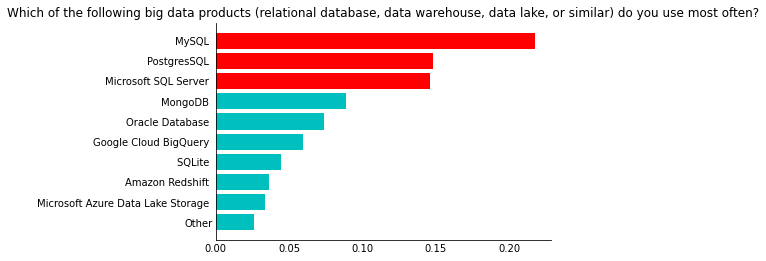

In [9]:
ks.plot_summary('Q30', 3)

## Why SQLite, not so data-driven...

- It is open-sourced
- It is self-contained
- It is light and portable
- And I **personally** think it is the best way for newbies to learn SQL on local machine

## Getting SQLiteStudio

## Download and install SQLiteStudio

- Windows: [SQLiteStudio-3.2.1.exe](https://drive.google.com/file/d/1bK0_JskM_8r2biRnClfrrvHwjr2kqn4S/view?usp=sharing)
- MacOS: [SQLiteStudio-3.2.1.dmg](https://drive.google.com/file/d/1EVZJucCRK49d4L7c8F9-fUAUsTYvRNpN/view?usp=sharing)

## Download our learning databases: [nba.db](https://drive.google.com/file/d/1QqQZTaGwdcUerJisOU0jxbjlaEgj-7f0/view?usp=sharing)

## Now we have a SQLite database client that is able to connect to an established database in our own local machine!

## Beginning with `SELECT`

## Basic `SELECT` syntax

A SELECT statement that fetches every row and column in a table called `teams`.

```sql
SELECT *
  FROM table_name;
```

In [10]:
conn = sqlite3.connect('../datasets/nba.db')
sql_query = """
SELECT *
  FROM teams;
"""

In [11]:
pd.read_sql(sql_query, conn)

,isNBAFranchise,isAllStar,city,altCityName,fullName,tricode,teamId,nickname,urlName,teamShortName,confName,divName
0,1,0,Atlanta,Atlanta,Atlanta Hawks,ATL,1610612737,Hawks,hawks,Atlanta,East,Southeast
1,1,0,Boston,Boston,Boston Celtics,BOS,1610612738,Celtics,celtics,Boston,East,Atlantic
2,1,0,Cleveland,Cleveland,Cleveland Cavaliers,CLE,1610612739,Cavaliers,cavaliers,Cleveland,East,Central
3,1,0,New Orleans,New Orleans,New Orleans Pelicans,NOP,1610612740,Pelicans,pelicans,New Orleans,West,Southwest
4,1,0,Chicago,Chicago,Chicago Bulls,CHI,1610612741,Bulls,bulls,Chicago,East,Central
5,1,0,Dallas,Dallas,Dallas Mavericks,DAL,1610612742,Mavericks,mavericks,Dallas,West,Southwest
6,1,0,Denver,Denver,Denver Nuggets,DEN,1610612743,Nuggets,nuggets,Denver,West,Northwest
7,1,0,Golden State,Golden State,Golden State Warriors,GSW,1610612744,Warriors,warriors,Golden State,West,Pacific
8,1,0,Houston,Houston,Houston Rockets,HOU,1610612745,Rockets,rockets,Houston,West,Southwest
9,1,0,LA,LA Clippers,LA Clippers,LAC,1610612746,Clippers,clippers,LA Clippers,West,Pacific


## The above single line of code shows the most basic form of a SQL query

- The asterisk following the `SELECT` keyword is a wildcard. Here, it’s shorthand for "select all columns"
- The `FROM` keyword indicates we want the query to return data from a particular table. The semicolon after the table name tells SQLite it’s the end of the query statement

## Let's move on querying a subset of columns

It’s more practical to limit the columns the query retrieves, especially with large tables

```sql
SELECT column_name
  FROM table_name;
```

In [12]:
sql_query = """
SELECT firstName, 
       lastName,
       dateOfBirthUTC
  FROM players;
"""

In [13]:
pd.read_sql(sql_query, conn)

,firstName,lastName,dateOfBirthUTC
0,LeBron,James,1984-12-30
1,Carmelo,Anthony,1984-05-29
2,Udonis,Haslem,1980-06-09
3,Dwight,Howard,1985-12-08
4,Andre,Iguodala,1984-01-28
...,...,...,...
488,Anthony,Gill,1992-10-17
489,Will,Magnay,1998-06-10
490,Facundo,Campazzo,1991-03-23
491,Nate,Darling,1998-08-30


## Using `DISTINCT` to find unique values

- It is common for a column to contain rows with duplicates
- To understand the range of values in a column, we can use the `DISTINCT` keyword

```sql
SELECT DISTINCT column_name
  FROM table_name;
```

In [14]:
sql_query = """
SELECT DISTINCT confName,
       divName
  FROM teams;
"""

In [15]:
pd.read_sql(sql_query, conn)

,confName,divName
0,East,Southeast
1,East,Atlantic
2,East,Central
3,West,Southwest
4,West,Northwest
5,West,Pacific


## Sorting data with `ORDER BY`

We order the results of a query using the keywords `ORDER BY` followed by the name of the column(s) to sort.

```sql
SELECT colum_name
  FROM table_name
 ORDER BY column_name;
```

In [16]:
sql_query = """
SELECT personId,
       points
  FROM career_summaries
 ORDER BY points;
"""

In [17]:
pd.read_sql(sql_query, conn)

,personId,points
0,1630203,NaN
1,1630206,NaN
2,1630266,NaN
3,204222,0.0
4,1629007,0.0
...,...,...
488,201566,21095.0
489,201935,21853.0
490,201142,23491.0
491,2546,26980.0


## By default, `ORDER BY` sorts values in ascending order

If we want to sort in descending order, add the `DESC` keyword.

```sql
SELECT column_name
  FROM table_name
 ORDER BY column_name DESC;
```

In [18]:
sql_query = """
SELECT personId,
       points
  FROM career_summaries
 ORDER BY points DESC;
"""

In [19]:
pd.read_sql(sql_query, conn)

,personId,points
0,2544,35236.0
1,2546,26980.0
2,201142,23491.0
3,201935,21853.0
4,201566,21095.0
...,...,...
488,1630234,0.0
489,1630268,0.0
490,1630203,NaN
491,1630206,NaN


## We are not limited to sorting on just one column

```sql
SELECT column_name
  FROM table_name
 ORDER BY column_name,
          column_name;
```

In [20]:
sql_query = """
SELECT firstName,
       lastName,
       dateOfBirthUTC
  FROM players
 ORDER BY firstName,
          dateOfBirthUTC DESC;
"""

In [21]:
pd.read_sql(sql_query, conn)

,firstName,lastName,dateOfBirthUTC
0,Aaron,Nesmith,1999-10-16
1,Aaron,Holiday,1996-09-30
2,Aaron,Gordon,1995-09-16
3,Abdel,Nader,1993-09-25
4,Adam,Mokoka,1998-07-18
...,...,...,...
488,Yuta,Watanabe,1994-10-13
489,Zach,Collins,1997-11-19
490,Zach,LaVine,1995-03-10
491,Zeke,Nnaji,2001-01-09


## Filtering rows with `WHERE`

The `WHERE` keyword allows us to find rows that match a specific value, a range of values, or multiple values.

```sql
SELECT column_name
  FROM table_name
 WHERE condition;
```

In [22]:
sql_query = """
SELECT personId,
       firstName,
       lastName
  FROM players
 WHERE lastName = 'James';
"""

In [23]:
pd.read_sql(sql_query, conn)

,personId,firstName,lastName
0,2544,LeBron,James
1,1629713,Justin,James


## The above query uses equals comparison operator `=` to find rows that exactly match, but we can use other operators

## Comparison and matching operators

- `=`: Equal to
- `!=`: Not equal to
- `>`, `>=`: Greater than; Greater than or equal to
- `<`, `<=`: Less than; Less than or equal to
- `BETWEEN`: Within a range
- `IN`: Match one of a set of values
- `LIKE`: Match a pattern
- `NOT`: Negates a condition

## Using the `BETWEEN` operator

In [24]:
sql_query = """
SELECT personId,
       ppg
  FROM career_summaries
 WHERE ppg BETWEEN 20 AND 25;
"""

In [25]:
pd.read_sql(sql_query, conn)

,personId,ppg
0,2546,23.3
1,201566,23.2
2,201933,21.4
3,201939,23.8
4,201942,20.1
5,202331,20.1
6,202681,22.7
7,203076,23.9
8,203078,21.7
9,203081,24.6


## Using `LIKE` with `WHERE`

Comparison operators are fairly straightforward, but `LIKE` deserves additional explanation.

## `LIKE` lets us search for patterns in strings by using two special characters

- Percent sign `%`: A wildcard matching one or more characters
- Underscore `_`: A wildcard matching just one character

## Using `LIKE` with `WHERE` and `%`

In [26]:
sql_query = """
SELECT firstName,
       lastName
  FROM players
 WHERE firstName LIKE 'K%';
"""

In [27]:
pd.read_sql(sql_query, conn)

,firstName,lastName
0,Kyle,Lowry
1,Kevin,Durant
2,Kevin,Love
3,Kyrie,Irving
4,Kemba,Walker
5,Klay,Thompson
6,Kawhi,Leonard
7,Khris,Middleton
8,Kent,Bazemore
9,Kelly,Olynyk


## Using `LIKE` with `WHERE` and `_`

In [28]:
sql_query = """
SELECT firstName,
       lastName
  FROM players
 WHERE firstName LIKE 'K____';
"""

In [29]:
pd.read_sql(sql_query, conn)

,firstName,lastName
0,Kevin,Durant
1,Kevin,Love
2,Kyrie,Irving
3,Kemba,Walker
4,Kawhi,Leonard
5,Khris,Middleton
6,Kelly,Olynyk
7,Kelly,Oubre Jr.
8,Kevon,Looney
9,Keita,Bates-Diop


## Combining conditions with `AND` and `OR`

Comparison operators become more useful when we combine them. To do this, we connect them using keywords `AND` and `OR`.

## Combining conditions with `AND`

In [30]:
sql_query = """
SELECT firstName,
       lastName
  FROM players
 WHERE firstName LIKE 'K%' AND
       lastName LIKE 'L%';
"""

In [31]:
pd.read_sql(sql_query, conn)

,firstName,lastName
0,Kyle,Lowry
1,Kevin,Love
2,Kawhi,Leonard
3,Kevon,Looney
4,Kira,Lewis Jr.


## Combining conditions with `OR`

In [32]:
sql_query = """
SELECT firstName, lastName
  FROM players
 WHERE firstName LIKE 'K%' OR
       lastName LIKE 'L%';
"""

In [33]:
pd.read_sql(sql_query, conn)

,firstName,lastName
0,Kyle,Lowry
1,Kevin,Durant
2,Kevin,Love
3,Brook,Lopez
4,Robin,Lopez
5,Kyrie,Irving
6,Kemba,Walker
7,Klay,Thompson
8,Kawhi,Leonard
9,Damian,Lillard


## Putting what we have so far all together

SQL is about the order of keywords, so follow this convention:

```sql
SELECT column_name
  FROM table_name
 WHERE condition
 ORDER BY column_name;
```